In [2]:
import pandas as pd

# Defining the data in a dictionary format
data = {
    "Model": ["ViT", "ResNet", "VGG16"],
    "Accuracy (%)": ["90-95", "93-96", "89-93"],
    "Loss (approx.)": ["0.1-0.2", "0.05-0.1", "0.1-0.2"],
    "Learning Rate": ["0.001 to 0.0003", "0.1 with decay", "0.001 with decay"],
    "Batch Size": ["64 or 128", "128 or 256", "64 or 128"],
    "Optimizer": ["Adam/AdamW", "SGD with momentum 0.9", "Adam/SGD with momentum 0.9"],
    "Epochs": ["100-300", "200-300", "200-300"],
    "Weight Decay": ["-", "0.0001 to 0.0005", "0.0005"],
    "Data Augmentation": ["Yes", "Yes", "Yes"],
    "Normalization": ["Layer Normalization", "Batch Normalization", "Batch Normalization"],
    "Regularization": ["Dropout 0.1-0.3", "None", "Dropout 0.5"]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,Model,Accuracy (%),Loss (approx.),Learning Rate,Batch Size,Optimizer,Epochs,Weight Decay,Data Augmentation,Normalization,Regularization
0,ViT,90-95,0.1-0.2,0.001 to 0.0003,64 or 128,Adam/AdamW,100-300,-,Yes,Layer Normalization,Dropout 0.1-0.3
1,ResNet,93-96,0.05-0.1,0.1 with decay,128 or 256,SGD with momentum 0.9,200-300,0.0001 to 0.0005,Yes,Batch Normalization,None
2,VGG16,89-93,0.1-0.2,0.001 with decay,64 or 128,Adam/SGD with momentum 0.9,200-300,0.0005,Yes,Batch Normalization,Dropout 0.5


# Import

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
import numpy as np

2024-08-18 18:39:54.599193: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-18 18:39:54.599297: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-18 18:39:54.728753: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Load Data

In [4]:
(x_train, y_train),(x_test, y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [5]:
x_train,x_test = x_train/255.0, x_test/255.0 

In [6]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [7]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [8]:
datagen = ImageDataGenerator(rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True)

datagen.fit(x_train)

In [9]:
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

# VGG16

In [10]:
# Vgg16

def creat_model_vgg16(input_shape=(32,32,3), num_class=10):
    model=models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D((2, 2)))
    
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D((2, 2)))
    
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D((2, 2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_class, activation='softmax'))
    return model    

In [11]:
vgg16_model = creat_model_vgg16()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
vgg16_model.compile(optimizer=optimizers.Adam(learning_rate=1e-3),
                   loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
vgg16_history = vgg16_model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=10,
                               validation_data=(x_test, y_test))

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  5/782 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.1656 - loss: 3.5355 

I0000 00:00:1724006432.668087     125 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1724006432.696275     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


531/782 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.3468 - loss: 2.1469

W0000 00:00:1724006457.381460     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3777 - loss: 2.0018

W0000 00:00:1724006468.648112     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 48ms/step - accuracy: 0.3783 - loss: 1.9988 - val_accuracy: 0.3355 - val_loss: 4.5660
Epoch 2/10


W0000 00:00:1724006469.962544     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6233 - loss: 1.0683 - val_accuracy: 0.3508 - val_loss: 6.2855
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6961 - loss: 0.8732 - val_accuracy: 0.4833 - val_loss: 2.7977
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.7403 - loss: 0.7505 - val_accuracy: 0.2334 - val_loss: 9.9097
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.7736 - loss: 0.6576 - val_accuracy: 0.1503 - val_loss: 10.3400
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.7851 - loss: 0.6179 - val_accuracy: 0.1510 - val_loss: 8.9957
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.8081 - loss: 0.5539 - val_accuracy: 0.1415 - val_loss: 13.8598
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.8205 - loss: 0.5169 - val_accuracy: 0.2499 - val_loss: 7.5334
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.8338 - loss: 0.4875 - val_accur

In [14]:
def display_pred(model, model_name):
    num_images=5
    indices = np.random.choice(len(x_test), num_images)
    sample_images = x_test[indices]
    sample_labels = y_test[indices]
    
    predictions = model.predict(sample_images)
    predictions_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(sample_labels, axis=1)
    
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(sample_images[i])
        plt.title(f"Model: {model_name}\nPredict: {class_names[predictions_classes[i]]}\nTrue: {class_names[true_classes[i]]}")
        plt.axis('off')
    plt.show()
    

In [15]:
#evaluate
vgg16_loss,vgg16_accuracy = vgg16_model.evaluate(x_test, y_test)

print(vgg16_loss,vgg16_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1636 - loss: 12.4874
12.523150444030762 0.16539999842643738


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


W0000 00:00:1724006736.187398     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


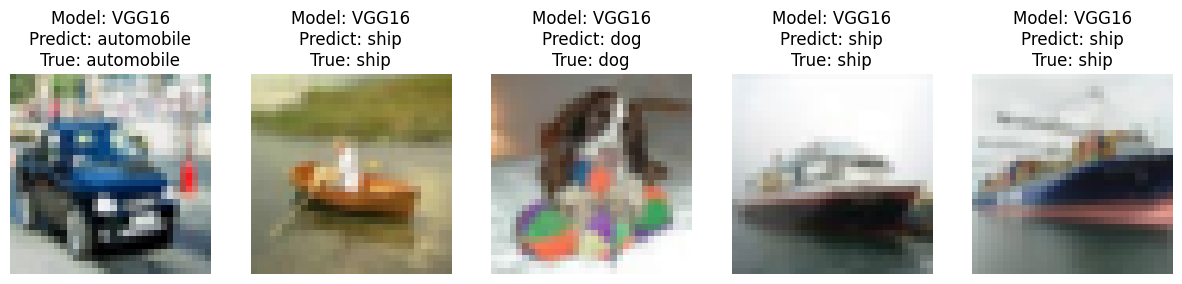

In [16]:
display_pred(vgg16_model, "VGG16")

# ResNet

In [17]:
from tensorflow.keras.applications import ResNet50

In [18]:
# # ResNet

# def creat_resnet50_model(input_shape=(32,32,3), num_class=10):
#     base_model = ResNet50(include_top=False, weights=None, input_shape=input_shape)
#     base_model.trainable=True
    
#     model = models.Sequential([
#         base_model,
#         layers.GlobalAveragePooling2D(),
#         layers.Dense(512, activation='relu'),
#         layers.BatchNormalization(),
#         layers.Dropout(0.5),
#         layers.Dense(num_class, activation='softmax')
#     ])
    
#     return model

# ResNet

In [19]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [20]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.1, momentum=0.9),
                   loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(datagen.flow(x_train, y_train, batch_size=128),
                                      epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 55s 109ms/step - accuracy: 0.1024 - loss: 4.9070 - val_accuracy: 0.1000 - val_loss: 2.3047
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.1000 - loss: 2.3053 - val_accuracy: 0.1000 - val_loss: 2.3032
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 75ms/step - accuracy: 0.0967 - loss: 2.3048 - val_accuracy: 0.1000 - val_loss: 2.3030
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.1004 - loss: 2.3042 - val_accuracy: 0.1000 - val_loss: 2.3058
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 75ms/step - accuracy: 0.0996 - loss: 2.3050 - val_accuracy: 0.1000 - val_loss: 2.3039
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.0997 - loss: 2.3041 - val_accuracy: 0.1000 - val_loss: 2.3041
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.0982 - loss: 2.3047 - val_accuracy: 0.1000 - val_loss: 2.3050
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 75ms/step - accuracy: 0.1015 - loss: 2.3041 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0968 - loss: 2.3034
ResNet50 Model - Loss: 2.30336594581604, Accuracy: 0.10000000149011612
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


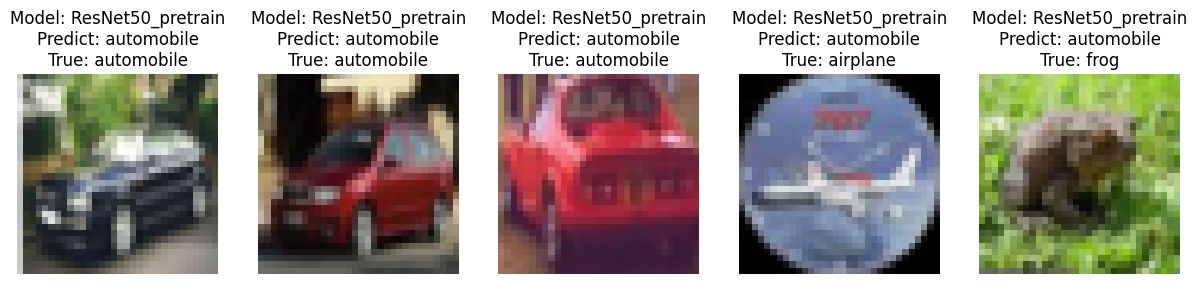

In [24]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'ResNet50 Model - Loss: {loss}, Accuracy: {accuracy}')

display_pred(model, "ResNet50_pretrain")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


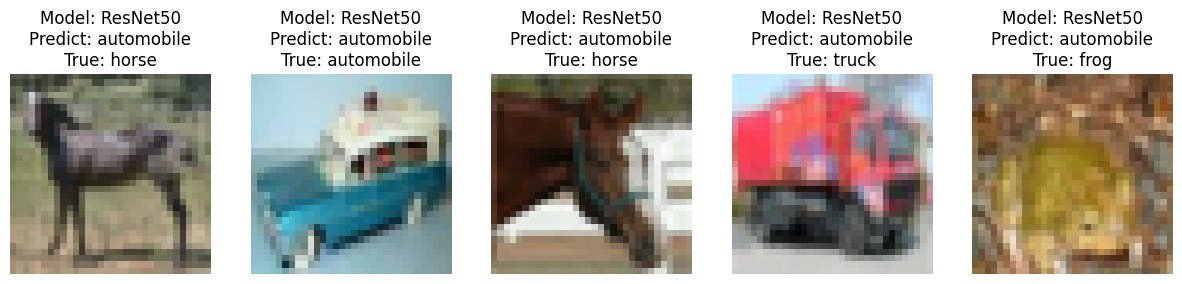

In [25]:
# Display predictions for ResNet50 model
display_pred(model, "ResNet50")